Мы являемся аналитиком интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Задача: приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Подготовка данных и приоритизация гипотез

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
hyp = pd.read_csv('C:\\Users\\Александр\Datasets/hypothesis.csv')
orders = pd.read_csv('C:\\Users\\Александр\Datasets/orders.csv')
visitors = pd.read_csv('C:\\Users\\Александр\Datasets/visitors.csv')

In [3]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# сделаем так, чтобы длинные записи помещались в нужных нам блоках
pd.options.display.max_colwidth = 100

In [5]:
hyp.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Видим, что пропусков в файле с гипотезами нет. Можем только поменять регистр для удобства. А затем - рассчитать нужные нам дополнительные показатели

In [6]:
#приведем названия столбцов к нижнему регистру
hyp.columns = hyp.columns.str.lower()

In [7]:
# рассчитаем показатель ICE
hyp['ice'] = (hyp['impact'] * hyp['confidence']) / hyp['efforts']
hyp.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


In [8]:
# рассчитаем показатель RICE
hyp['rice'] = (hyp['reach'] * hyp['impact'] * hyp['confidence']) / hyp['efforts']
hyp.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


После смены метода приоритизации гипотезы поменялись местами. Это связано с тем, что появился параметр охвата, и он максимально сильно выражен у гипотез 7, 2 и 0. То есть они повлияют на очень большое количество пользователей

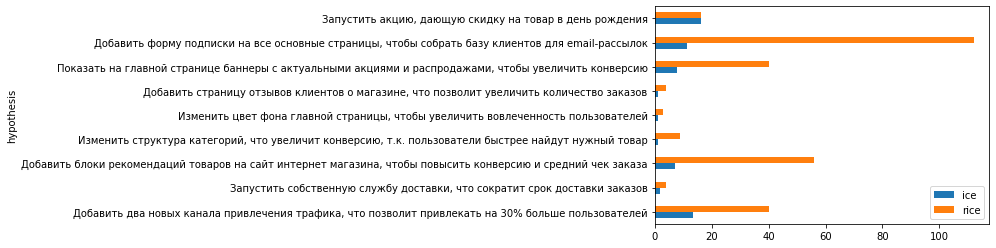

In [9]:
hyp.set_index('hypothesis')[['ice', 'rice']].plot(kind='barh')
plt.show()

Вывод можем сделать следующий: в подобных случаях приоритезация гипотез будет разной в зависимости от того, можем ли мы измерить количество пользователей, которое она затронет. Если можем - то принимаем во внимание охват reach - используем RICE - приритетность видим в одном порядке (7 - 2 - 0). Если не можем рассчитать показатель - то приоритетность другая (8 - 0 - 7)


Теперь перейдем к предобработке данных основных датасетов

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Проверим дубликаты в файле orders. Найдем только полные дубликаты по строкам. Так как значения в отдельных столбцах могут повторяться. Например: одному посетителю соответствуют несколько заказов и тд. Но проверим также дубликаты по столбцу Транзакций: повторяющихся значений там быть не может

In [12]:
orders.duplicated().sum()

0

In [13]:
orders['transactionId'].duplicated().sum()

0

Видим, что все типы данных нас устраивают, кроме столбца с датой - его мы и изменим для удобства при дальнейших расчетах

In [14]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [15]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Аналогичную предобратку совершим и с файлом Visitors: приведем столбец с датой к нужному типу и найдем полные дубликаты

In [17]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [18]:
visitors.duplicated().sum()

0

Данные очищены и подготовлены для дальнейшего анализа

## Анализ А/В теста

### График кумулятивной выручки по группам

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами:
date — дата;
group — группа A/B-теста (A или B);
orders — кумулятивное количество заказов на указанную дату в указанной группе;
buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [19]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
#datesGroups.head()

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий.
Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups

Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков. Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина

In [20]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [21]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [22]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


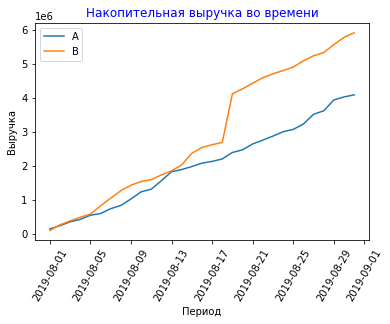

In [23]:
#Построим графики кумулятивной выручки по дням и группам A/B-тестирования:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=60)
plt.legend()
plt.xlabel('Период')
plt.ylabel('Выручка')
plt.title('Накопительная выручка во времени', color = 'blue')
plt.show()

Выручка A почти равномерно увеличивается в течение всего теста. 
Выручка же группы В резко растет в одном моменте. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем далее

### График кумулятивного среднего чека по группам

Разделим кумулятивную выручку на кумулятивное число заказов

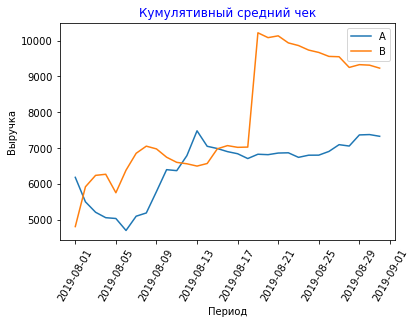

In [24]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=60)
plt.legend()
plt.xlabel('Период')
plt.ylabel('Выручка')
plt.title('Кумулятивный средний чек', color = 'blue')
plt.show()

Средний чек группы А хоть и растет неравномрно, но на протяжении второй половины жизни стабилизируется. Средний чек же группы В в один момент нереально взрывается: скорее всего, имеет место очень высокий чек. Его и отследим далее.

###  График относительного различия среднего чека

Построим график относительного различия для среднего чека

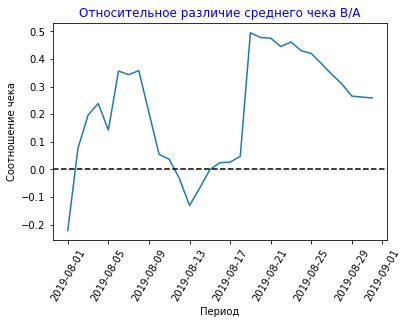

In [25]:
# собираем данные 
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=60)
plt.xlabel('Период')
plt.ylabel('Соотношение чека')
plt.title('Относительное различие среднего чека B/A', color = 'blue')
plt.show()

График относительного различия среднего чека наводит на такую же мысль, что и  график относительного различия конверсий: в целом показатели группы В выше, но быть может, это происходит из-за наличия в группе В аномальнл высоких значений? А что если по очищенным данным (без аномалий) группы покажут примерно одинаковый результат? Это и проверим в дальнейшем

### График кумулятивной конверсии по группам

Аналогично проанализируем график кумулятивной конверсии

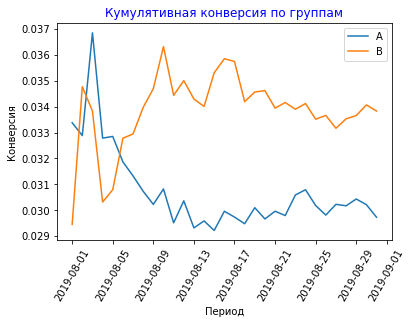

In [26]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=60)
plt.xlabel('Период')
plt.ylabel('Конверсия')
plt.title('Кумулятивная конверсия по группам', color = 'blue')
plt.show()

Сначала графики сильно менялись, но затем конверсия группы В вырвалась вперёд и стабилизировалась, а конверсия группы А просела и также зафиксировалась.

### График относительного изменения кумулятивной конверсии группы B к группе A

Построим график относительного различия кумулятивных конверсий

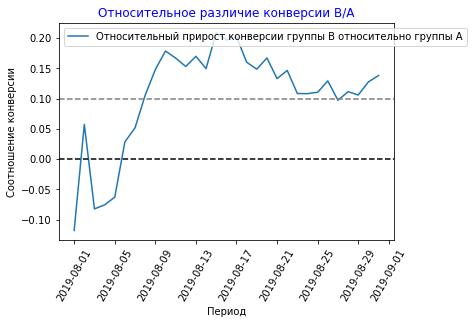

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend(loc='upper left')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xticks(rotation=60)
plt.xlabel('Период')
plt.ylabel('Соотношение конверсии')
plt.title('Относительное различие конверсии B/A', color = 'blue')
plt.show()

Из графика видим, что есть существенное различие в конверсиях. Проверим, связано ли это с аномальными чеками

### Точечный график количества заказов по пользователям

In [28]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [29]:
orders_per_user = orders.groupby('visitorId').agg({'transactionId': 'nunique'})

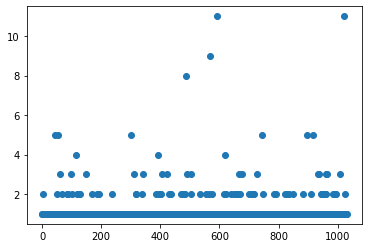

In [30]:
x_values = pd.Series(range(0,len(orders_per_user['transactionId'])))
plt.scatter(x_values, orders_per_user['transactionId']) 
plt.show()

In [31]:
orders_per_user.describe()

,transactionId
count,1031.000000
mean,1.161009
std,0.724919
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,11.000000


Из графика и описания видим, что в данных явно есть заказы, выбивающиеся из средних значенией.

### 95-й и 99-й перцентили количества заказов на пользователя

In [32]:
display(np.percentile(orders_per_user['transactionId'], [90, 95, 99])) 

array([1., 2., 4.])

In [33]:
orders_per_user.query('transactionId > 4').count()

transactionId    10
dtype: int64

Не более 5% людей совершают более 2х заказов. Не более 1% - более 4х. Последнее значение как раз и примем за границу аномальности. Тем более у нас выпадет таким образом только 10 пользователей

### Точечный график стоимостей заказов

Изучим гистограмму распределения стоимостей заказов

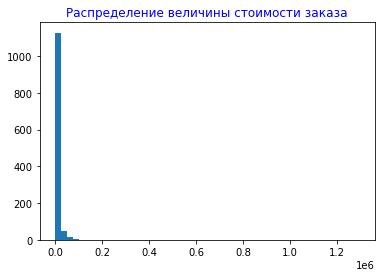

In [34]:
plt.hist(orders['revenue'], bins=50) 
plt.title('Распределение величины стоимости заказа', color = 'blue')
plt.show()

In [35]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


В данных явно есть заказы, выбивающиеся из средних значенией: об этом говорит расхождение среднего с медианой. 

Оценим стоимость заказов еще одним способом

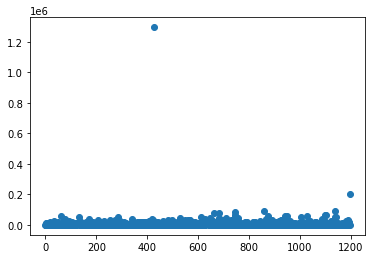

In [36]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.show()

Выбросы мы, конечно же, видим. Но общая картина смазывается, поэтому построим график без них.

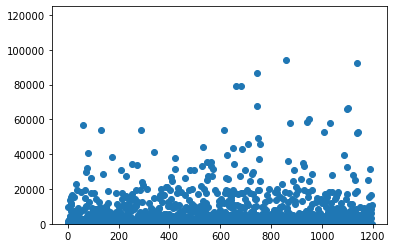

In [37]:
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 125000)
plt.show()

Получилась более наглядная картина. Чтобы ее конкретизировать еще сильнее, разберемся с перцентилями.

### 95-й и 99-й перцентили количества стоимостей заказов

In [38]:
display(np.percentile(orders['revenue'], [90, 95, 99])) 


array([18168. , 28000. , 58233.2])

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Поэтому в дальнейшем будем брать в расчет заказы стоимостью до 58 233 рублей


### Cтатистическая значимость различий в конверсии между группами по «сырым» данным

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Ниже мы будем проверять нулевую гипотезу H0 о том, что статистически значимых различий в среднем чеке и конверсии между группами нет. Сначала - по сырым данным, затем - по очищенным

In [39]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами visitorId, orders. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [40]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
Переменная sampleA должна состоять из двух частей:
Список с количеством заказов для каждого из пользователей: ordersByUsersA[orders].
Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах

In [41]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

display("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

'0.008'

'0.138'

Вывод: по «сырым» данным видим существенные различия в конверсии групп A и B.
Первое число — p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. И относительный выигрыш группы B равен 13.8% — второе число в выводе.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.
А ещё найдём относительные различия в среднем чеке между группами:

In [42]:
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'0.365'

'0.259'

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Но средний чек группы B значительно выше среднего чека группы A.

Напомним, что найденные ранее 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей методом shape().

In [43]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape)

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorId, dtype: int64

(59,)

Всего 86 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. 

### Cтатистическая значимость различий в конверсии между группами по «сырым» данным


### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [44]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:


In [45]:
display('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'0.009'

'0.145'

Результаты по конверсии практически не изменились. Произошло ли что-нибудь с результатами по среднему чеку?

In [46]:
display(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'0.481'

'-0.014'

P-value увеличился, а разница между сегментами сократилась.


Что имеем в итоге? Статистическая значимость конверсий между сырыми и очищенными данными изменилась слабо (с 0,08 до 0,09). А вот значимость в различии среднего чека выросла сильно (с 0,365 до 0,481).

### Выводы по тесту

Какие выводы по тесту можем сделать?
- Прорабатывать гиотезы мы будем в очередности 7 - 2 - 0 
- Есть статистически значимое различие по конверсии между группами как по «сырым», так и по очищенным данным (0.008 и 0.009)
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по очищенным данным (0.365 и 0.481)
- График различия конверсии между группами сообщает, что результаты группы B гораздо лучше группы A
- График различия среднего чека сообщает, что результаты группы B гораздо лучше группы A

Исходя из обнаруженных фактов, тест следует признать успешным